# Imports

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

from config import paths
import os

# Connecting and getting data

In [10]:
folder_paths = paths.get_paths()
folder_path = folder_paths["data"]
file_path = os.path.join(folder_path, 'combine_ML.csv')
df = pd.read_csv(file_path)

In [11]:
print(df)

      Parameter_name  Parameter_value Regression_model  Correlating_parameter  \
0    marching_cubess             0.90          XGBoost                    NaN   
1             alphas             0.30          XGBoost                    NaN   
2    marching_cubess             0.30    Random_forest                    NaN   
3    marching_cubess             0.70    Random_forest                    NaN   
4           poissons            12.00    Random_forest                    NaN   
..               ...              ...              ...                    ...   
215           alphas             4.00          XGBoost                    NaN   
216   ball_pivotings             0.25          XGBoost                    NaN   
217           alphas             0.20    Random_forest                    NaN   
218           alphas             0.01          XGBoost                    NaN   
219           alphas             0.01    Random_forest                    NaN   

     RMSE_score_calibration

# Plots

## R2 for each parameter

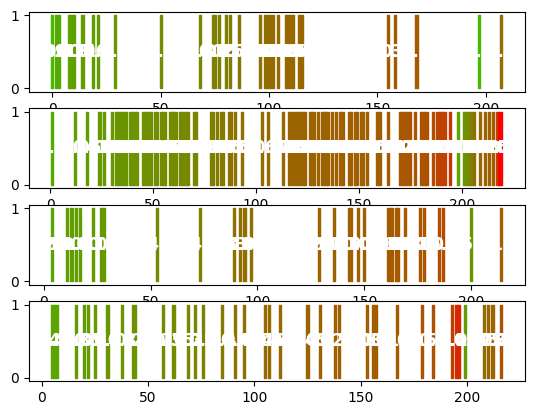

In [47]:
number_of_subplots = len(df['Parameter_name'].unique())
fig, axs = plt.subplots(number_of_subplots, 1)

# Define the colors
colors = [(1, 0, 0), (0, 1, 0)]  # Red to Green

# Create the colormap
cmap_name = 'red_green'
n_bins = 100
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

for index, parameter_type in enumerate(df['Parameter_name'].unique()):
    df_current = df[df['Parameter_name'] == parameter_type]
    
    for i, row in df_current.iterrows():
        axs[index].fill_between([i - 0.5, i + 0.5], 0, 1, color=cmap(row['R2_score_validation']))
        axs[index].text(i, 0.5, row['Parameter_value'], ha='center', va='center', fontsize=12, fontweight='bold', color='white')

plt.show()
    

C:\Users\dhelman-lab\AppData\Local\Temp\ipykernel_6016\2573954237.py:27: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, ticks=r2_scores, label='$R^2$ Score')


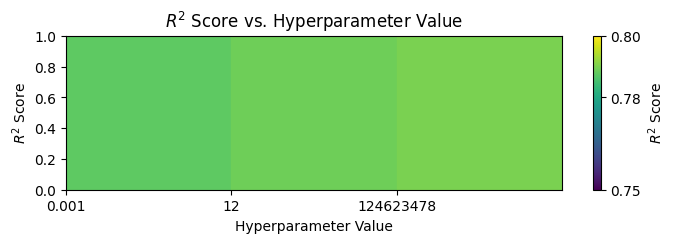

In [48]:
# Hyperparameter values
hyperparameter_values = [0.001, 12, 124623478]
# Corresponding R^2 values
r2_scores = [0.75, 0.78, 0.80]

plt.figure(figsize=(8, 2))

# Plotting colored squares
for i, (hp, r2) in enumerate(zip(hyperparameter_values, r2_scores)):
    plt.fill([i, i, i + 1, i + 1], [0, 1, 1, 0], color=plt.cm.viridis(r2))

# Setting x-axis limit and ticks
plt.xlim(0, len(hyperparameter_values))
plt.xticks(range(len(hyperparameter_values)), hyperparameter_values)

# Setting y-axis limit
plt.ylim(0, 1)

plt.xlabel('Hyperparameter Value')
plt.ylabel('$R^2$ Score')
plt.title('$R^2$ Score vs. Hyperparameter Value')
plt.grid(False)

# Show colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(r2_scores), vmax=max(r2_scores)))
sm.set_array([])
plt.colorbar(sm, ticks=r2_scores, label='$R^2$ Score')

plt.show()